In [1]:
cd ..

/home/alex/tmp/kaggle-spaceship-titanic


In [9]:
from src.imports import * 

from src.transformers import *
from src.vars import *

In [10]:
train = pd.read_csv('data/source/train.csv')

In [11]:
test = pd.read_csv('data/source/test.csv')

In [12]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [13]:
train.shape

(8693, 14)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [15]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [16]:
train.dtypes.value_counts()

object     7
float64    6
bool       1
Name: count, dtype: int64

In [17]:
train.describe(include=np.number).round(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [18]:
dd = train.describe(exclude=np.number).round(2)
dd

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


In [19]:
train.Transported = train.Transported.astype(int)
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [20]:
X = train.drop('Transported', axis=1)
y = train['Transported']

In [21]:
dd = dd.T
dd

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2
Transported,8693,2,True,4378


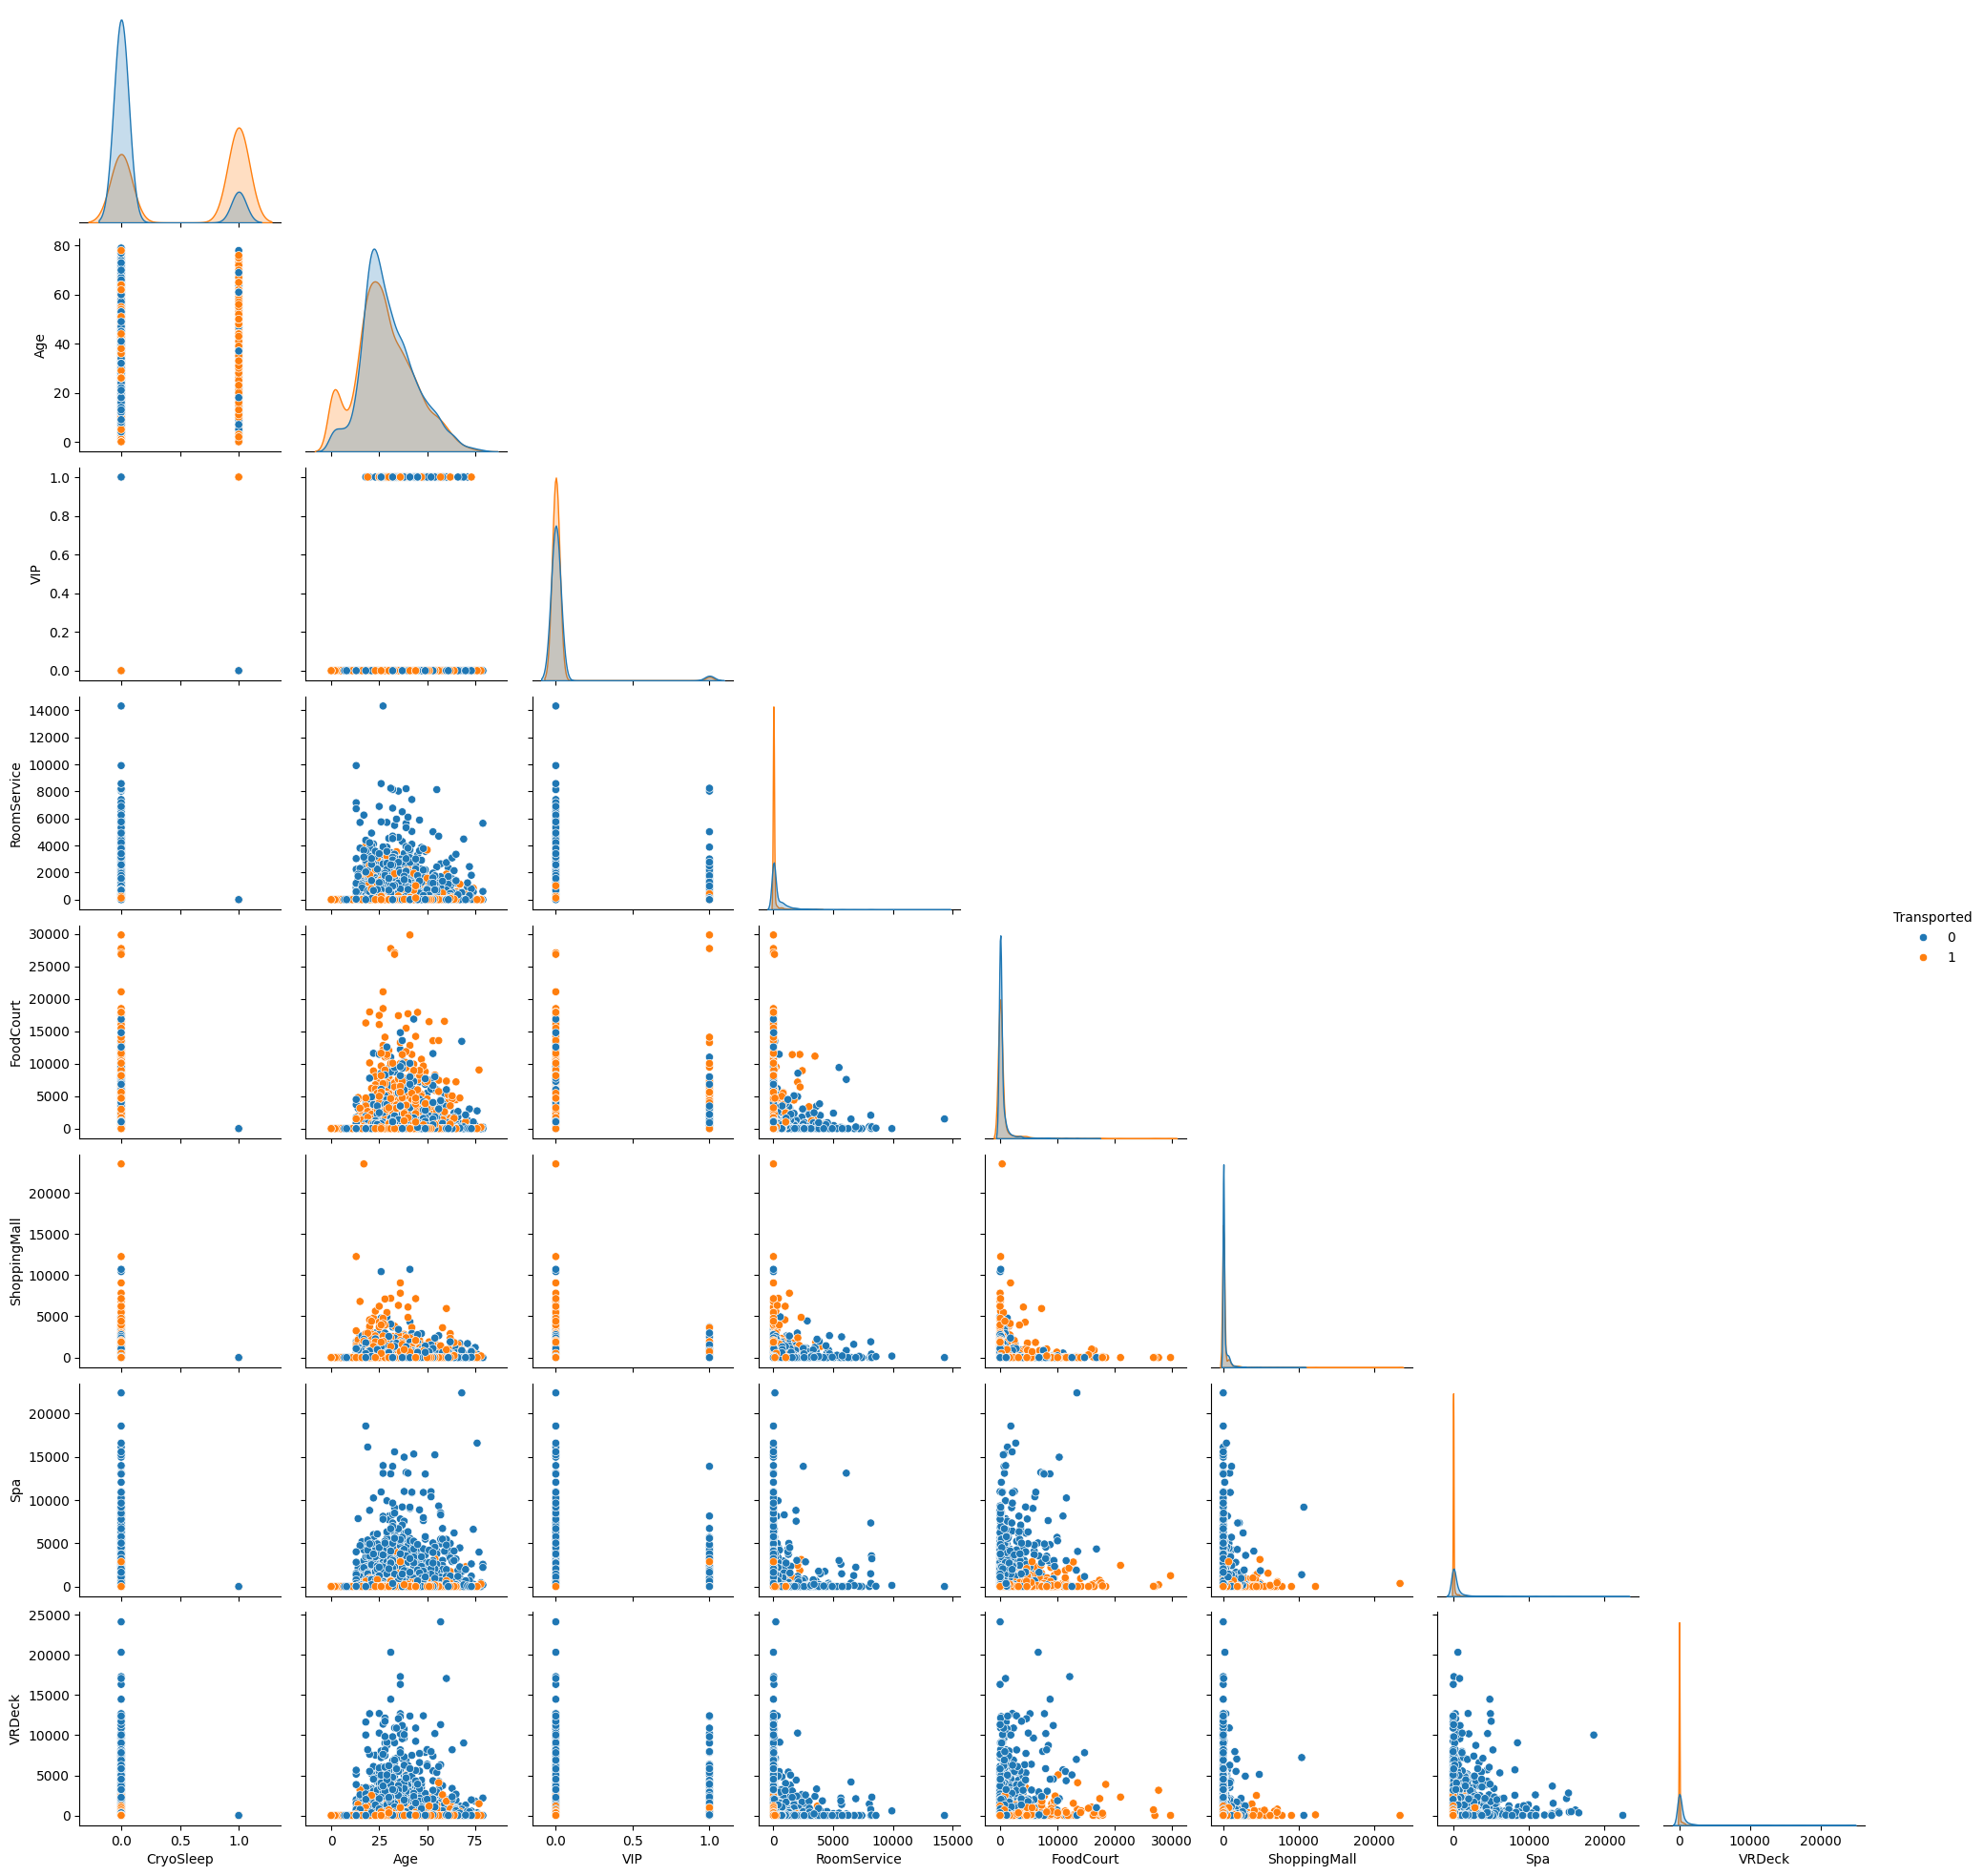

In [22]:
sns.pairplot(train, corner=True, hue='Transported')

In [23]:
scaler_list = [
    StandardScaler(),
    "passthrough",
    MinMaxScaler(),
    RobustScaler(),
    Normalizer(),
    QuantileTransformer(n_quantiles=100, output_distribution="uniform"),
    QuantileTransformer(n_quantiles=100),
]


In [37]:
pipeline = Pipeline(
    [
        ("column_selector", ColumnSelector()),
        ("log_transformer", LogTransformer()),
        ("preprocessor", ColumnTransformer([])),
        ("sampler_1", RandomUnderSampler()),
        ("imputer", KNNImputer()),
        ("scaler", StandardScaler()),
        ("sampler_2", RandomUnderSampler()),
        ("estimator", LogisticRegression()),
    ]
)

In [38]:
param_grid = {
    

    "log_transformer__threshold" : [0.5, 1, 3, 5, 10, 7, 12],
    "preprocessor__transformers" : [t0,t1],
    "sampler_1" : [RandomUnderSampler(), "passthrough"],
    "scaler" : scaler_list,
    "sampler_2" : [RandomUnderSampler(), "passthrough"],
    "estimator" : [LogisticRegression(),]
}

In [39]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,  # StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True,
    verbose=1,
)

In [29]:
grid.fit(X, y)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


/home/alex/tmp/kaggle-spaceship-titanic/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/tmp/kaggle-spaceship-titanic/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_selector', ColumnSelector()),
                                       ('log_transformer', LogTransformer()),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[])),
                                       ('sampler_1', RandomUnderSampler()),
                                       ('imputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('sampler_2', RandomUnderSampler()),
                                       ('estimator', LogisticRegression())]),
             n_jobs=-1,
             param_grid...
                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x7f312eabf100>)]],
                         'sampler_1': [RandomUnderSampler(), 'passthrough'],
                         'sampler_2': [RandomUnderSampler(), 'passthrough'],
                         'scaler': [StandardScaler(), 'passthrough',
                                    MinMaxScaler(), RobustScaler(),
                                    Normalizer(),
                                    QuantileTransformer(n_quantiles=100),
                                    QuantileTransformer(n_quantiles=100)]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [30]:
def resultize(grid):
    res = grid.cv_results_
    res = pd.DataFrame(res)

    res = res.sort_values(by="rank_test_score")
    res.drop(columns="rank_test_score", inplace=True)

    cols = [i for i in res.columns if "split" not in i]

    res = res[cols]

    res = res.round(2)

    return res

In [32]:
res  = resultize(grid).head(10)
res


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_log_transformer__threshold,param_preprocessor__transformers,param_sampler_1,param_sampler_2,param_scaler,params,mean_test_score,std_test_score,mean_train_score,std_train_score
235,2.39,0.04,1.12,0.11,LogisticRegression(),10,"[(num, passthrough, <sklearn.compose._column_t...",RandomUnderSampler(),passthrough,Normalizer(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.79,0.0
263,2.37,0.13,1.25,0.21,LogisticRegression(),10,"[(num, passthrough, <sklearn.compose._column_t...",RandomUnderSampler(),passthrough,Normalizer(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.02,0.79,0.0
242,2.24,0.16,1.12,0.27,LogisticRegression(),10,"[(num, passthrough, <sklearn.compose._column_t...",passthrough,RandomUnderSampler(),Normalizer(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.79,0.0
249,2.52,0.33,1.25,0.18,LogisticRegression(),10,"[(num, passthrough, <sklearn.compose._column_t...",passthrough,passthrough,Normalizer(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.79,0.0
87,3.19,0.12,1.39,0.14,LogisticRegression(),1,"[(num, passthrough, <sklearn.compose._column_t...",RandomUnderSampler(),RandomUnderSampler(),RobustScaler(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.78,0.0
141,3.34,0.45,1.51,0.14,LogisticRegression(),3,"[(num, passthrough, <sklearn.compose._column_t...",RandomUnderSampler(),RandomUnderSampler(),passthrough,"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.78,0.0
270,2.57,0.65,1.17,0.07,LogisticRegression(),10,"[(num, passthrough, <sklearn.compose._column_t...",passthrough,RandomUnderSampler(),Normalizer(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.79,0.0
199,2.68,0.30,1.19,0.23,LogisticRegression(),5,"[(num, passthrough, <sklearn.compose._column_t...",RandomUnderSampler(),RandomUnderSampler(),RobustScaler(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.78,0.0
228,2.50,0.21,1.16,0.16,LogisticRegression(),10,"[(num, passthrough, <sklearn.compose._column_t...",RandomUnderSampler(),RandomUnderSampler(),Normalizer(),"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.79,0.0
148,2.06,0.18,1.24,0.18,LogisticRegression(),3,"[(num, passthrough, <sklearn.compose._column_t...",RandomUnderSampler(),passthrough,passthrough,"{'estimator': LogisticRegression(), 'log_trans...",0.78,0.01,0.78,0.0


In [34]:
res.params.iloc[0]

{'estimator': LogisticRegression(),
 'log_transformer__threshold': 10,
 'preprocessor__transformers': [('num',
   'passthrough',
   <sklearn.compose._column_transformer.make_column_selector at 0x7f312ea8ffd0>)],
 'sampler_1': RandomUnderSampler(),
 'sampler_2': 'passthrough',
 'scaler': Normalizer()}

In [35]:
res.params.iloc[1]

{'estimator': LogisticRegression(),
 'log_transformer__threshold': 10,
 'preprocessor__transformers': [('num',
   'passthrough',
   <sklearn.compose._column_transformer.make_column_selector at 0x7f312eabf790>),
  ('cat',
   OneHotEncoder(),
   <sklearn.compose._column_transformer.make_column_selector at 0x7f312eabf100>)],
 'sampler_1': RandomUnderSampler(),
 'sampler_2': 'passthrough',
 'scaler': Normalizer()}

In [36]:
res.params.iloc[2]

{'estimator': LogisticRegression(),
 'log_transformer__threshold': 10,
 'preprocessor__transformers': [('num',
   'passthrough',
   <sklearn.compose._column_transformer.make_column_selector at 0x7f312ea8ffd0>)],
 'sampler_1': 'passthrough',
 'sampler_2': RandomUnderSampler(),
 'scaler': Normalizer()}

In [41]:
param_grid = {
    

    "log_transformer__threshold" : [3, 5, 10, 7, 12],
    "preprocessor__transformers" : [t0,t1],
    "sampler_1" : [RandomUnderSampler(), "passthrough"],
    "scaler" : ["passthrough", StandardScaler(), Normalizer()],
    "sampler_2" : ["passthrough"],
    "estimator" : [RandomForestClassifier(),]
}

In [42]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True,
    verbose=1,
)

grid.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
res  = resultize(grid).head(10)
res
